In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## About Colabs

Machine Learning Crash Course uses Colaboratories (**Colabs**) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). Like all Jupyter Notebooks, a Colab consists of two kinds of components:

  * **Text cells**, which contain explanations. You are currently reading a text cell.
  * **Code cells**, which contain Python code for you to run. Code cells have a light gray background.

You *read* the text cells and *run* the code cells.

### Running code cells

You must run code cells in order. In other words, you may only run a code cell once all the code cells preceding it have already been run. 

To run a code cell:

  1. Place the cursor anywhere inside the [ ] area at the top left of a code cell. The area inside the [ ] will display an arrow.
  2. Click the arrow.

Alternatively, you may invoke **Runtime->Run all**. Note, though, that some of the code cells will fail because not all the coding is complete. (You'll complete the coding as part of the exercise.)

### Understanding hidden code cells

We've **hidden** the code in code cells that don't advance the learning objectives. For example, we've hidden the code that plots graphs. However, **you must still run code cells containing hidden code**. You'll know that the code is hidden because you'll see a title (for example, "Load the functions that build and train a model") without seeing the code.

To view the hidden code, just double click the header.

### Why did you see an error?

If a code cell returns an error when you run it, consider two common problems:

  * You didn't run *all* of the code cells preceding the current code cell.
  * If the code cell is labeled as a **Task**, then you haven't written the necessary code. 

## Use the right version of TensorFlow

The following hidden code cell ensures that the Colab will run on TensorFlow 2.X, which is the most recent version of TensorFlow:

In [2]:
#@title Run this Colab on TensorFlow 2.x
#%tensorflow_version 2.x

## Import relevant modules

The following cell imports the packages that the program requires:

In [4]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [5]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [6]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [7]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 0s 22ms/sample - loss: 139.2230 - root_mean_squared_error: 11.7993
Epoch 2/10
12/12 [==============================] - 0s 527us/sample - loss: 133.1521 - root_mean_squared_error: 11.5392
Epoch 3/10
12/12 [==============================] - 0s 585us/sample - loss: 128.8790 - root_mean_squared_error: 11.3525
Epoch 4/10
12/12 [==============================] - 0s 659us/sample - loss: 125.3779 - root_mean_squared_error: 11.1972
Epoch 5/10
12/12 [==============================] - 0s 675us/sample - loss: 122.3259 - root_mean_squared_error: 11.0601
Epoch 6/10
12/12 [==============================] - 0s 714us/sample - loss: 119.5738 - root_mean_squared_error: 10.9350
Epoch 7/10
12/12 [==============================] - 0s 844us/sample - loss: 117.0386 - root_mean_squared_error: 10.8184
Epoch 8/10
12/12 [==============================] - 0s 764us/sample - loss: 114.6689 - root_mean_squared_error: 10.7084
Epoch 9/10
12/12 [===

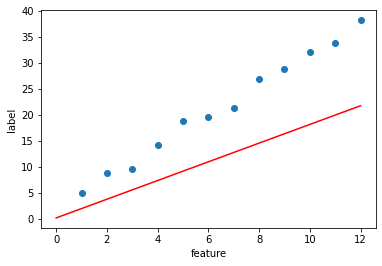

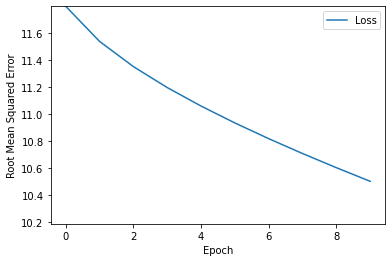

In [8]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

In [9]:
learning_rate=0.01
epochs= ?   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

SyntaxError: invalid syntax (<ipython-input-9-eba175bc66c9>, line 2)

Train on 12 samples
Epoch 1/450
12/12 [==============================] - 0s 15ms/sample - loss: 834.1863 - root_mean_squared_error: 28.8823
Epoch 2/450
12/12 [==============================] - 0s 517us/sample - loss: 819.1843 - root_mean_squared_error: 28.6214
Epoch 3/450
12/12 [==============================] - 0s 651us/sample - loss: 808.4323 - root_mean_squared_error: 28.4329
Epoch 4/450
12/12 [==============================] - 0s 789us/sample - loss: 799.5075 - root_mean_squared_error: 28.2756
Epoch 5/450
12/12 [==============================] - 0s 805us/sample - loss: 791.6418 - root_mean_squared_error: 28.1361
Epoch 6/450
12/12 [==============================] - 0s 772us/sample - loss: 784.4795 - root_mean_squared_error: 28.0086
Epoch 7/450
12/12 [==============================] - 0s 770us/sample - loss: 777.8223 - root_mean_squared_error: 27.8895
Epoch 8/450
12/12 [==============================] - 0s 738us/sample - loss: 771.5471 - root_mean_squared_error: 27.7767
Epoch 9/450
1

12/12 [==============================] - 0s 669us/sample - loss: 517.1585 - root_mean_squared_error: 22.7411
Epoch 69/450
12/12 [==============================] - 0s 752us/sample - loss: 513.5298 - root_mean_squared_error: 22.6612
Epoch 70/450
12/12 [==============================] - 0s 682us/sample - loss: 509.9145 - root_mean_squared_error: 22.5813
Epoch 71/450
12/12 [==============================] - 0s 720us/sample - loss: 506.3125 - root_mean_squared_error: 22.5014
Epoch 72/450
12/12 [==============================] - 0s 553us/sample - loss: 502.7238 - root_mean_squared_error: 22.4215
Epoch 73/450
12/12 [==============================] - 0s 653us/sample - loss: 499.1484 - root_mean_squared_error: 22.3416
Epoch 74/450
12/12 [==============================] - 0s 570us/sample - loss: 495.5864 - root_mean_squared_error: 22.2618
Epoch 75/450
12/12 [==============================] - 0s 746us/sample - loss: 492.0376 - root_mean_squared_error: 22.1819
Epoch 76/450
12/12 [=================

Epoch 135/450
12/12 [==============================] - 0s 664us/sample - loss: 303.2119 - root_mean_squared_error: 17.4130
Epoch 136/450
12/12 [==============================] - 0s 820us/sample - loss: 300.4645 - root_mean_squared_error: 17.3339
Epoch 137/450
12/12 [==============================] - 0s 563us/sample - loss: 297.7301 - root_mean_squared_error: 17.2549
Epoch 138/450
12/12 [==============================] - 0s 678us/sample - loss: 295.0088 - root_mean_squared_error: 17.1758
Epoch 139/450
12/12 [==============================] - 0s 577us/sample - loss: 292.3006 - root_mean_squared_error: 17.0968
Epoch 140/450
12/12 [==============================] - 0s 684us/sample - loss: 289.6053 - root_mean_squared_error: 17.0178
Epoch 141/450
12/12 [==============================] - 0s 727us/sample - loss: 286.9232 - root_mean_squared_error: 16.9388
Epoch 142/450
12/12 [==============================] - 0s 757us/sample - loss: 284.2540 - root_mean_squared_error: 16.8598
Epoch 143/450
12

Epoch 202/450
12/12 [==============================] - 0s 713us/sample - loss: 147.8439 - root_mean_squared_error: 12.1591
Epoch 203/450
12/12 [==============================] - 0s 465us/sample - loss: 145.9637 - root_mean_squared_error: 12.0815
Epoch 204/450
12/12 [==============================] - 0s 739us/sample - loss: 144.0963 - root_mean_squared_error: 12.0040
Epoch 205/450
12/12 [==============================] - 0s 505us/sample - loss: 142.2416 - root_mean_squared_error: 11.9265
Epoch 206/450
12/12 [==============================] - 0s 783us/sample - loss: 140.3998 - root_mean_squared_error: 11.8490
Epoch 207/450
12/12 [==============================] - 0s 403us/sample - loss: 138.5707 - root_mean_squared_error: 11.7716
Epoch 208/450
12/12 [==============================] - 0s 757us/sample - loss: 136.7544 - root_mean_squared_error: 11.6942
Epoch 209/450
12/12 [==============================] - 0s 544us/sample - loss: 134.9509 - root_mean_squared_error: 11.6168
Epoch 210/450
12

Epoch 270/450
12/12 [==============================] - 0s 728us/sample - loss: 48.8156 - root_mean_squared_error: 6.9868
Epoch 271/450
12/12 [==============================] - 0s 643us/sample - loss: 47.7892 - root_mean_squared_error: 6.9130
Epoch 272/450
12/12 [==============================] - 0s 713us/sample - loss: 46.7749 - root_mean_squared_error: 6.8392
Epoch 273/450
12/12 [==============================] - 0s 637us/sample - loss: 45.7729 - root_mean_squared_error: 6.7656
Epoch 274/450
12/12 [==============================] - 0s 538us/sample - loss: 44.7830 - root_mean_squared_error: 6.6920
Epoch 275/450
12/12 [==============================] - 0s 727us/sample - loss: 43.8052 - root_mean_squared_error: 6.6186
Epoch 276/450
12/12 [==============================] - 0s 467us/sample - loss: 42.8396 - root_mean_squared_error: 6.5452
Epoch 277/450
12/12 [==============================] - 0s 723us/sample - loss: 41.8861 - root_mean_squared_error: 6.4720
Epoch 278/450
12/12 [===========

Epoch 338/450
12/12 [==============================] - 0s 676us/sample - loss: 5.6610 - root_mean_squared_error: 2.3793
Epoch 339/450
12/12 [==============================] - 0s 767us/sample - loss: 5.4018 - root_mean_squared_error: 2.3242
Epoch 340/450
12/12 [==============================] - 0s 561us/sample - loss: 5.1522 - root_mean_squared_error: 2.2698
Epoch 341/450
12/12 [==============================] - 0s 789us/sample - loss: 4.9119 - root_mean_squared_error: 2.2163
Epoch 342/450
12/12 [==============================] - 0s 672us/sample - loss: 4.6810 - root_mean_squared_error: 2.1636
Epoch 343/450
12/12 [==============================] - 0s 512us/sample - loss: 4.4593 - root_mean_squared_error: 2.1117
Epoch 344/450
12/12 [==============================] - 0s 815us/sample - loss: 4.2467 - root_mean_squared_error: 2.0608
Epoch 345/450
12/12 [==============================] - 0s 729us/sample - loss: 4.0431 - root_mean_squared_error: 2.0107
Epoch 346/450
12/12 [===================

Epoch 407/450
12/12 [==============================] - 0s 639us/sample - loss: 1.1100 - root_mean_squared_error: 1.0536
Epoch 408/450
12/12 [==============================] - 0s 747us/sample - loss: 1.1058 - root_mean_squared_error: 1.0516
Epoch 409/450
12/12 [==============================] - 0s 716us/sample - loss: 1.1016 - root_mean_squared_error: 1.0496
Epoch 410/450
12/12 [==============================] - 0s 727us/sample - loss: 1.0974 - root_mean_squared_error: 1.0476
Epoch 411/450
12/12 [==============================] - 0s 536us/sample - loss: 1.0933 - root_mean_squared_error: 1.0456
Epoch 412/450
12/12 [==============================] - 0s 749us/sample - loss: 1.0892 - root_mean_squared_error: 1.0436
Epoch 413/450
12/12 [==============================] - 0s 539us/sample - loss: 1.0851 - root_mean_squared_error: 1.0417
Epoch 414/450
12/12 [==============================] - 0s 760us/sample - loss: 1.0811 - root_mean_squared_error: 1.0398
Epoch 415/450
12/12 [===================

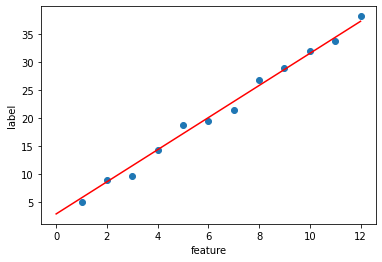

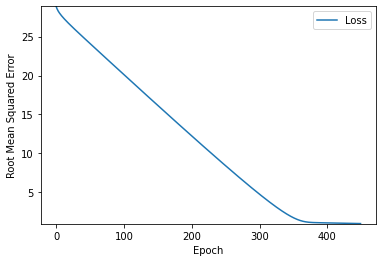

In [10]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Train on 12 samples
Epoch 1/500
12/12 [==============================] - 0s 15ms/sample - loss: 993.3799 - root_mean_squared_error: 31.5179
Epoch 2/500
12/12 [==============================] - 0s 488us/sample - loss: 6653200.5000 - root_mean_squared_error: 2579.3799
Epoch 3/500
12/12 [==============================] - 0s 540us/sample - loss: 982.3921 - root_mean_squared_error: 31.3431
Epoch 4/500
12/12 [==============================] - 0s 1ms/sample - loss: 5.8092 - root_mean_squared_error: 2.4102
Epoch 5/500
12/12 [==============================] - 0s 701us/sample - loss: 1.4671 - root_mean_squared_error: 1.2112
Epoch 6/500
12/12 [==============================] - 0s 748us/sample - loss: 1.3695 - root_mean_squared_error: 1.1703
Epoch 7/500
12/12 [==============================] - 0s 776us/sample - loss: 1.3356 - root_mean_squared_error: 1.1557
Epoch 8/500
12/12 [==============================] - 0s 790us/sample - loss: 1.3043 - root_mean_squared_error: 1.1421
Epoch 9/500
12/12 [=====

Epoch 68/500
12/12 [==============================] - 0s 709us/sample - loss: 324014.7812 - root_mean_squared_error: 569.2230
Epoch 69/500
12/12 [==============================] - 0s 560us/sample - loss: 256845.5469 - root_mean_squared_error: 506.7993
Epoch 70/500
12/12 [==============================] - 0s 771us/sample - loss: 189266.2031 - root_mean_squared_error: 435.0474
Epoch 71/500
12/12 [==============================] - 0s 938us/sample - loss: 140714.5156 - root_mean_squared_error: 375.1193
Epoch 72/500
12/12 [==============================] - 0s 984us/sample - loss: 111280.1875 - root_mean_squared_error: 333.5869
Epoch 73/500
12/12 [==============================] - 0s 809us/sample - loss: 96242.3984 - root_mean_squared_error: 310.2296
Epoch 74/500
12/12 [==============================] - 0s 671us/sample - loss: 91946.2266 - root_mean_squared_error: 303.2263
Epoch 75/500
12/12 [==============================] - 0s 861us/sample - loss: 96765.7422 - root_mean_squared_error: 311.

Epoch 133/500
12/12 [==============================] - 0s 643us/sample - loss: 171479.9219 - root_mean_squared_error: 414.1013
Epoch 134/500
12/12 [==============================] - 0s 883us/sample - loss: 173101.4531 - root_mean_squared_error: 416.0546
Epoch 135/500
12/12 [==============================] - 0s 813us/sample - loss: 174023.8438 - root_mean_squared_error: 417.1617
Epoch 136/500
12/12 [==============================] - 0s 772us/sample - loss: 174119.0469 - root_mean_squared_error: 417.2758
Epoch 137/500
12/12 [==============================] - 0s 729us/sample - loss: 173450.0156 - root_mean_squared_error: 416.4733
Epoch 138/500
12/12 [==============================] - 0s 795us/sample - loss: 172236.7969 - root_mean_squared_error: 415.0142
Epoch 139/500
12/12 [==============================] - 0s 757us/sample - loss: 170787.7969 - root_mean_squared_error: 413.2648
Epoch 140/500
12/12 [==============================] - 0s 743us/sample - loss: 169420.3750 - root_mean_squared_

Epoch 198/500
12/12 [==============================] - 0s 754us/sample - loss: 170284.5000 - root_mean_squared_error: 412.6554
Epoch 199/500
12/12 [==============================] - 0s 899us/sample - loss: 170323.0938 - root_mean_squared_error: 412.7022
Epoch 200/500
12/12 [==============================] - 0s 1ms/sample - loss: 170376.7812 - root_mean_squared_error: 412.7672
Epoch 201/500
12/12 [==============================] - 0s 645us/sample - loss: 170433.2031 - root_mean_squared_error: 412.8356
Epoch 202/500
12/12 [==============================] - 0s 702us/sample - loss: 170480.8906 - root_mean_squared_error: 412.8933
Epoch 203/500
12/12 [==============================] - 0s 816us/sample - loss: 170511.1719 - root_mean_squared_error: 412.9300
Epoch 204/500
12/12 [==============================] - 0s 588us/sample - loss: 170519.7500 - root_mean_squared_error: 412.9404
Epoch 205/500
12/12 [==============================] - 0s 665us/sample - loss: 170506.8906 - root_mean_squared_er

Epoch 263/500
12/12 [==============================] - 0s 594us/sample - loss: 170415.9375 - root_mean_squared_error: 412.8147
Epoch 264/500
12/12 [==============================] - 0s 718us/sample - loss: 170414.4219 - root_mean_squared_error: 412.8128
Epoch 265/500
12/12 [==============================] - 0s 625us/sample - loss: 170413.7031 - root_mean_squared_error: 412.8120
Epoch 266/500
12/12 [==============================] - 0s 684us/sample - loss: 170413.7969 - root_mean_squared_error: 412.8121
Epoch 267/500
12/12 [==============================] - 0s 947us/sample - loss: 170414.6250 - root_mean_squared_error: 412.8130
Epoch 268/500
12/12 [==============================] - 0s 781us/sample - loss: 170415.9844 - root_mean_squared_error: 412.8147
Epoch 269/500
12/12 [==============================] - 0s 736us/sample - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 270/500
12/12 [==============================] - 0s 809us/sample - loss: 170418.9375 - root_mean_squared_

Epoch 328/500
12/12 [==============================] - 0s 797us/sample - loss: 170417.8906 - root_mean_squared_error: 412.8170
Epoch 329/500
12/12 [==============================] - 0s 666us/sample - loss: 170417.7031 - root_mean_squared_error: 412.8168
Epoch 330/500
12/12 [==============================] - 0s 862us/sample - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 331/500
12/12 [==============================] - 0s 839us/sample - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 332/500
12/12 [==============================] - 0s 605us/sample - loss: 170417.3281 - root_mean_squared_error: 412.8163
Epoch 333/500
12/12 [==============================] - 0s 688us/sample - loss: 170417.2031 - root_mean_squared_error: 412.8162
Epoch 334/500
12/12 [==============================] - 0s 753us/sample - loss: 170417.2656 - root_mean_squared_error: 412.8163
Epoch 335/500
12/12 [==============================] - 0s 728us/sample - loss: 170417.3594 - root_mean_squared_

Epoch 393/500
12/12 [==============================] - 0s 654us/sample - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 394/500
12/12 [==============================] - 0s 878us/sample - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 395/500
12/12 [==============================] - 0s 792us/sample - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 396/500
12/12 [==============================] - 0s 652us/sample - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 397/500
12/12 [==============================] - 0s 558us/sample - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 398/500
12/12 [==============================] - 0s 600us/sample - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 399/500
12/12 [==============================] - 0s 718us/sample - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 400/500
12/12 [==============================] - 0s 608us/sample - loss: 170417.5156 - root_mean_squared_

Epoch 458/500
12/12 [==============================] - 0s 688us/sample - loss: 170417.7344 - root_mean_squared_error: 412.8168
Epoch 459/500
12/12 [==============================] - 0s 776us/sample - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 460/500
12/12 [==============================] - 0s 851us/sample - loss: 170417.3750 - root_mean_squared_error: 412.8164
Epoch 461/500
12/12 [==============================] - 0s 722us/sample - loss: 170417.2656 - root_mean_squared_error: 412.8163
Epoch 462/500
12/12 [==============================] - 0s 680us/sample - loss: 170417.2031 - root_mean_squared_error: 412.8162
Epoch 463/500
12/12 [==============================] - 0s 823us/sample - loss: 170417.2031 - root_mean_squared_error: 412.8162
Epoch 464/500
12/12 [==============================] - 0s 730us/sample - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 465/500
12/12 [==============================] - 0s 704us/sample - loss: 170417.4844 - root_mean_squared_

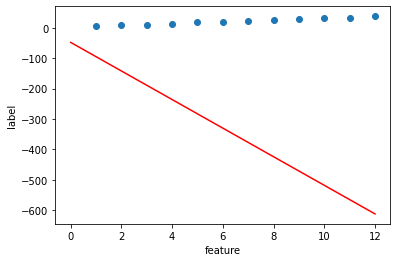

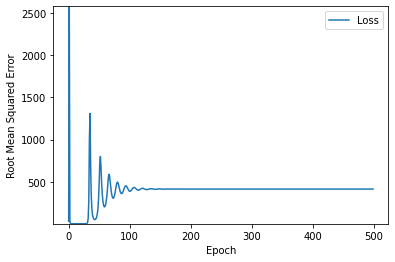

In [11]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

In [12]:
# Set the learning rate and number of epochs
learning_rate= ?  # Replace ? with a floating-point number
epochs= ?   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

SyntaxError: invalid syntax (<ipython-input-12-501744457bc7>, line 2)

Train on 12 samples
Epoch 1/70
12/12 [==============================] - 0s 15ms/sample - loss: 880.5692 - root_mean_squared_error: 29.6744
Epoch 2/70
12/12 [==============================] - 0s 628us/sample - loss: 677.1588 - root_mean_squared_error: 26.0223
Epoch 3/70
12/12 [==============================] - 0s 641us/sample - loss: 554.3251 - root_mean_squared_error: 23.5441
Epoch 4/70
12/12 [==============================] - 0s 732us/sample - loss: 464.8672 - root_mean_squared_error: 21.5608
Epoch 5/70
12/12 [==============================] - 0s 882us/sample - loss: 394.6584 - root_mean_squared_error: 19.8660
Epoch 6/70
12/12 [==============================] - 0s 737us/sample - loss: 337.3192 - root_mean_squared_error: 18.3663
Epoch 7/70
12/12 [==============================] - 0s 652us/sample - loss: 289.3488 - root_mean_squared_error: 17.0103
Epoch 8/70
12/12 [==============================] - 0s 744us/sample - loss: 248.5873 - root_mean_squared_error: 15.7667
Epoch 9/70
12/12 [===

Epoch 70/70
12/12 [==============================] - 0s 738us/sample - loss: 1.0032 - root_mean_squared_error: 1.0016


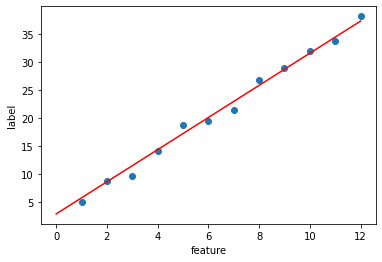

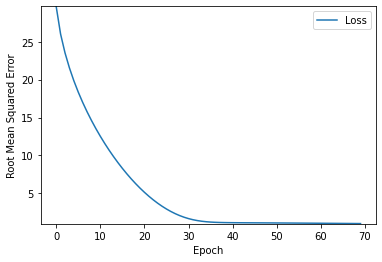

In [13]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 0s 15ms/sample - loss: 585.6172 - root_mean_squared_error: 24.1995
Epoch 2/100
12/12 [==============================] - 0s 537us/sample - loss: 524.1934 - root_mean_squared_error: 22.8953
Epoch 3/100
12/12 [==============================] - 0s 757us/sample - loss: 482.8745 - root_mean_squared_error: 21.9744
Epoch 4/100
12/12 [==============================] - 0s 849us/sample - loss: 450.1370 - root_mean_squared_error: 21.2164
Epoch 5/100
12/12 [==============================] - 0s 740us/sample - loss: 422.4084 - root_mean_squared_error: 20.5526
Epoch 6/100
12/12 [==============================] - 0s 759us/sample - loss: 398.0504 - root_mean_squared_error: 19.9512
Epoch 7/100
12/12 [==============================] - 0s 788us/sample - loss: 376.1577 - root_mean_squared_error: 19.3948
Epoch 8/100
12/12 [==============================] - 0s 756us/sample - loss: 356.1700 - root_mean_squared_error: 18.8725
Epoch 9/100
1

Epoch 69/100
12/12 [==============================] - 0s 610us/sample - loss: 1.8345 - root_mean_squared_error: 1.3545
Epoch 70/100
12/12 [==============================] - 0s 686us/sample - loss: 1.6403 - root_mean_squared_error: 1.2807
Epoch 71/100
12/12 [==============================] - 0s 780us/sample - loss: 1.4834 - root_mean_squared_error: 1.2179
Epoch 72/100
12/12 [==============================] - 0s 635us/sample - loss: 1.3583 - root_mean_squared_error: 1.1655
Epoch 73/100
12/12 [==============================] - 0s 735us/sample - loss: 1.2601 - root_mean_squared_error: 1.1225
Epoch 74/100
12/12 [==============================] - 0s 688us/sample - loss: 1.1840 - root_mean_squared_error: 1.0881
Epoch 75/100
12/12 [==============================] - 0s 804us/sample - loss: 1.1261 - root_mean_squared_error: 1.0612
Epoch 76/100
12/12 [==============================] - 0s 634us/sample - loss: 1.0827 - root_mean_squared_error: 1.0405
Epoch 77/100
12/12 [============================

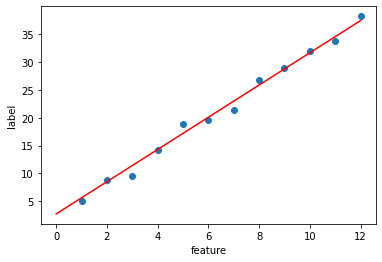

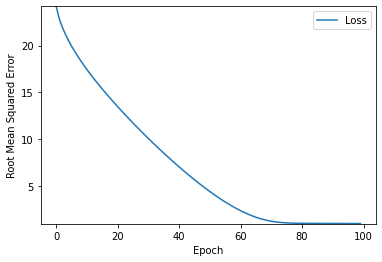

In [14]:
learning_rate=0.05
epochs=100
my_batch_size=12  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/125
12/12 [==============================] - 0s 15ms/sample - loss: 1307.2013 - root_mean_squared_error: 36.1552
Epoch 2/125
12/12 [==============================] - 0s 518us/sample - loss: 1214.5790 - root_mean_squared_error: 34.8508
Epoch 3/125
12/12 [==============================] - 0s 702us/sample - loss: 1150.6471 - root_mean_squared_error: 33.9212
Epoch 4/125
12/12 [==============================] - 0s 737us/sample - loss: 1099.0116 - root_mean_squared_error: 33.1513
Epoch 5/125
12/12 [==============================] - 0s 748us/sample - loss: 1054.5444 - root_mean_squared_error: 32.4738
Epoch 6/125
12/12 [==============================] - 0s 698us/sample - loss: 1014.8845 - root_mean_squared_error: 31.8573
Epoch 7/125
12/12 [==============================] - 0s 757us/sample - loss: 978.7224 - root_mean_squared_error: 31.2845
Epoch 8/125
12/12 [==============================] - 0s 689us/sample - loss: 945.2477 - root_mean_squared_error: 30.7449
Epoch 9

12/12 [==============================] - 0s 707us/sample - loss: 78.9143 - root_mean_squared_error: 8.8834
Epoch 69/125
12/12 [==============================] - 0s 749us/sample - loss: 73.7311 - root_mean_squared_error: 8.5867
Epoch 70/125
12/12 [==============================] - 0s 821us/sample - loss: 68.7719 - root_mean_squared_error: 8.2929
Epoch 71/125
12/12 [==============================] - 0s 750us/sample - loss: 64.0337 - root_mean_squared_error: 8.0021
Epoch 72/125
12/12 [==============================] - 0s 672us/sample - loss: 59.5131 - root_mean_squared_error: 7.7145
Epoch 73/125
12/12 [==============================] - 0s 699us/sample - loss: 55.2068 - root_mean_squared_error: 7.4301
Epoch 74/125
12/12 [==============================] - 0s 705us/sample - loss: 51.1113 - root_mean_squared_error: 7.1492
Epoch 75/125
12/12 [==============================] - 0s 753us/sample - loss: 47.2230 - root_mean_squared_error: 6.8719
Epoch 76/125
12/12 [==============================] -

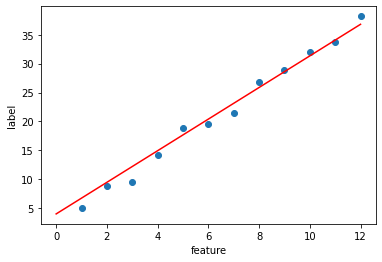

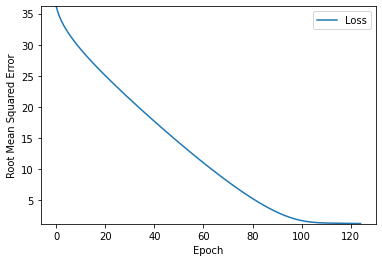

In [15]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the training loss too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.